[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 7.8823822  12.85350005  2.66662606  8.44016793  8.44016793 12.85350005
 19.51753051  6.43410787  4.02683581 12.69692633 15.26077211  6.03289586
 13.90056236 10.69086627 14.70298638  8.44016793  6.83531988 10.84743999
 15.90662242  5.07389812 14.30177437 15.90662242 15.66198412  4.2714741
  3.87026209 19.91874253 10.84743999  9.48723024 17.51147046 10.28965426
  7.63774391  7.8823822  15.66198412 12.85350005  6.43410787  4.02683581
 -0.94428204 15.10419839 12.69692633  6.83531988  5.07389812  9.64380396
 14.45834809  8.28359421 16.30783443 10.04501597 11.09207828 14.30177437
 12.05107603 16.70904644 13.65592407 15.26077211 10.44622798  8.44016793
  4.42804782 11.4932903  10.84743999  2.82319977 15.90

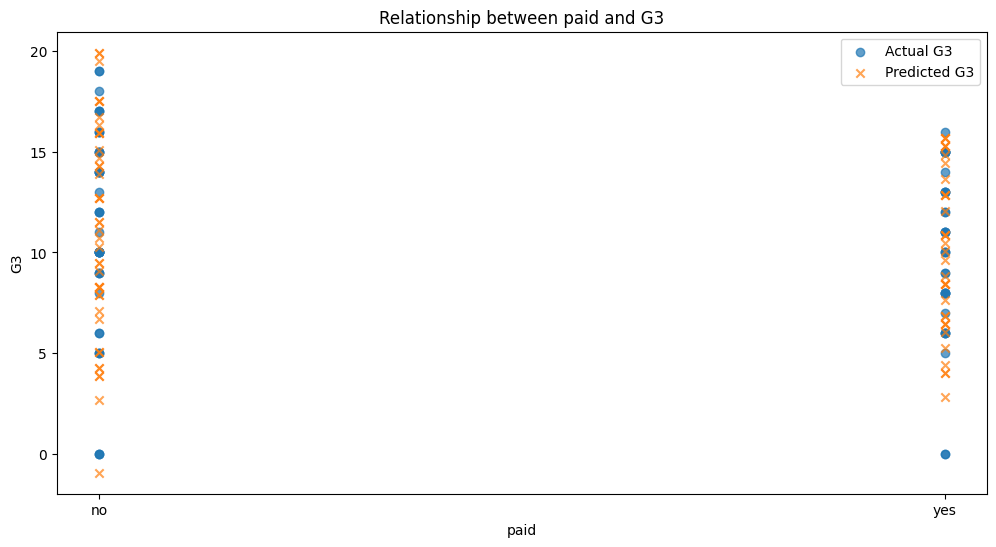

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['paid', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'paid'
data = pd.get_dummies(data, columns=['paid'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'paid_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'paid' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'paid': df.loc[X_test.index, 'paid'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'paid' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['paid'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['paid'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('paid')
plt.ylabel('G3')
plt.title('Relationship between paid and G3')
plt.legend()
plt.show()
